Program that extracts the information about the position and velocity of atoms in each sites along with charge and charge velocity at those sites in each frames.


path="" refers to the path of the dump file from which data is to be extracted

frames=------ number of frames during openmd execution

atomNumber=----------- total number of atomic sites during program execution

In [77]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
%matplotlib inline

#==================================================================================================================
#path="/home/hbhattar/afs/Hemanta/metals/ImageCharge/Pt100ImageCharge/Simulation/ImageSlab.dump"; #the path of the file
#path="/home/hbhattar/afs/Hemanta/metals/ImageCharge/Pt100ImageCharge/Simulation/ImageSlabNFQ.dump"; 
path="/home/hbhattar/afs/Hemanta/metals/DifferentSlabSameEField/24Layers.dump"; 
frames=300                  ;              #total frames in dump file
atomNumber=768;         #total atoms in lattice


#====================================================================================================================


fileDump=open(path)  #dump file for info extraction
linesDump=fileDump.readlines()

processP="Wait"
processC="Wait"


#information storage matrix 
#posiiton and velocity storage
x=num.zeros((frames,atomNumber))
y=num.zeros((frames,atomNumber))
z=num.zeros((frames,atomNumber))
fx=num.zeros((frames,atomNumber))
fy=num.zeros((frames,atomNumber))
fz=num.zeros((frames,atomNumber))
vx=num.zeros((frames,atomNumber))
vy=num.zeros((frames,atomNumber))
vz=num.zeros((frames,atomNumber))


#charge and velocity storage matrix
c=num.zeros((frames,atomNumber))
cv=num.zeros((frames,atomNumber))
ey=num.zeros((frames,atomNumber))
ex=num.zeros((frames,atomNumber))
ez=num.zeros((frames,atomNumber))
#frame count initilization
fCount=0
index=0  #index for the atoms
for line in linesDump:
    linesSplit=str.split(line)
    length=len(linesSplit)
    
    if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
        processP="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
        processP="Wait"
        index=0
        continue;
        
    elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
        processC="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
        fCount=fCount+1
        index=0;
        processC="Wait"
        continue;
   
    elif(fCount>=frames):
        break;
        
    else:
        processP=processP;
        processC=processC;
        
        
    if (processP=="Start"):
        x[fCount][index]=float(linesSplit[2])
        y[fCount][index]=float(linesSplit[3])
        z[fCount][index]=float(linesSplit[4])
        vx[fCount][index]=float(linesSplit[5])
        vy[fCount][index]=float(linesSplit[6])
        vz[fCount][index]=float(linesSplit[7])
        #fx[fCount][index]=float(linesSplit[8])
        #fy[fCount][index]=float(linesSplit[9])
        #fz[fCount][index]=float(linesSplit[10])
        index=index+1
        
    if(processC=="Start"):
        c[fCount][index]=float(linesSplit[3])
        cv[fCount][index]=float(linesSplit[4])
        ez[fCount][index]=float(linesSplit[7])
        ey[fCount][index]=float(linesSplit[6])
        ex[fCount][index]=float(linesSplit[5])
        index=index+1
       

In [78]:
#determine the layers
a=num.sort(list(set(z[0,0:atomNumber-2])))
layer=[]
for var in a:
    layer.append(num.where(z[0]==var))
    


In [79]:
Ex=[]
Ey=[]
Ez=[]
charge=[]
framing=0
for items in range(a.size):
    Ex.append(sum(ex[framing][layer[items][0]])/float(layer[items][0].size))
    Ey.append(sum(ey[framing][layer[items][0]])/float(layer[items][0].size))
    Ez.append(sum(ez[framing][layer[items][0]])/float(layer[items][0].size))
    charge.append(sum(c[framing][layer[items][0]])/float(layer[items][0].size))
    
    
 

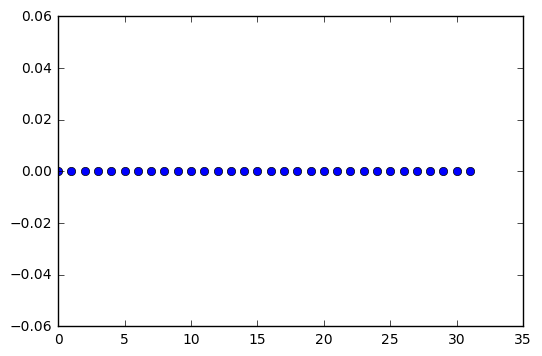

In [80]:
lab.plot(vx[0][layer[6][0]],'o')

In [81]:
efq=ez[49][num.logical_and(x[0][:]==-2.020829,y[0][:]==.700036)]
zfq=z[0][num.logical_and(x[0][:]==-2.020829,y[0][:]==.700036)]
argusortfq=num.argsort(zfq)

In [82]:
enfq=ez[0][num.logical_and(x[0][:]==-2.020829,y[0][:]==.700036)]
print(enfq)
znfq=z[0][num.logical_and(x[0][:]==-2.020829,y[0][:]==.700036)]
print(znfq)
argusortnfq=num.argsort(znfq)


[]
[]


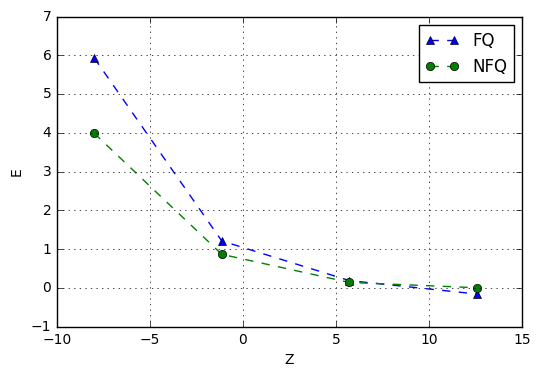

In [833]:
lab.plot(num.sort(zfq)[1:],efq[argusortfq][1:],"^--",label="FQ")
lab.plot(num.sort(znfq)[1:],enfq[argusortnfq][1:],"o--",label="NFQ")
lab.ylim([-1,7])
lab.legend(loc="upper right")
lab.xlabel("Z")
lab.ylabel("E")
lab.savefig("charge_screening.eps")
lab.grid()
lab.show()

In [675]:
ez[0][layer[0][0]]

array([ 0.])

In [ ]:
#lab.plot(range(0,len(layer)),Ex,'o--',label="Ex")
#lab.plot(range(0,len(layer)),Ey,"^--",label="Ey")
lab.plot(range(1,len(layer)),Ez[1:],"^--",label="Ez")

lab.xlabel("layers")
lab.ylabel("E")
lab.title("Layers Vs E")
lab.legend(loc="upper right")
#lab.xlim([-1,8])
#lab.ylim([0,.2])
#lab.savefig("../MetalsCrystals/plateBuilder/Results/ImageEVrsLayers.eps")

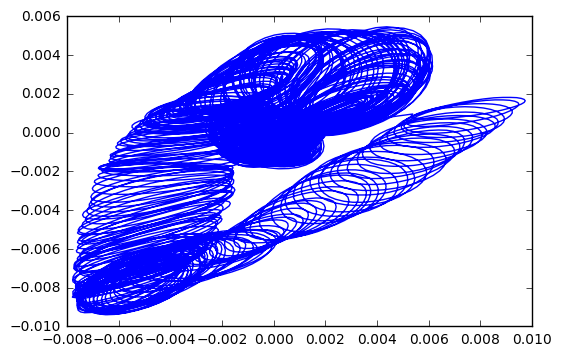

In [818]:
crystal=num.sum(fz,axis=1)-fz[:,4800]
lab.plot(fx[:,4800],fy[:,4800])
#lab.plot(-crystal)
#lab.xlim([0,13360])

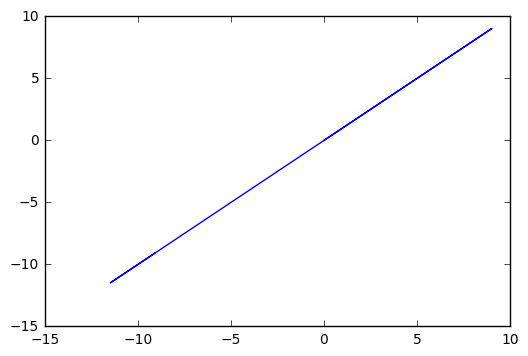

In [796]:
lab.plot(-fz[:,4800],crystal)

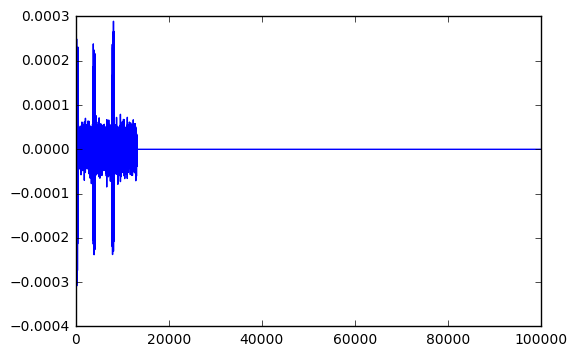

In [828]:
lab.plot(fz[:,4800]+crystal)
lab.xlim([50,525])

In [821]:
num.mean(fz[:,4800]+crystal)

-4.940479807853393e-08

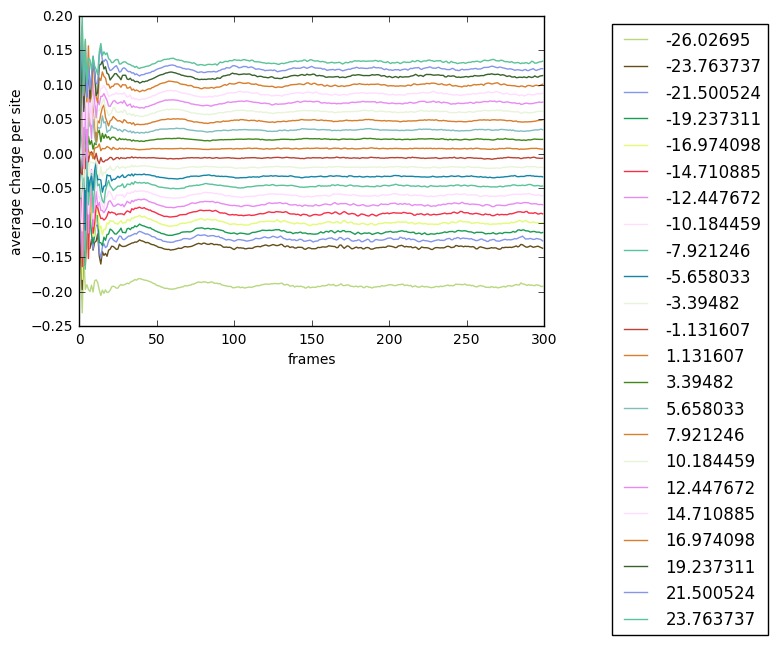

In [83]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color
g=num.array([generate_color() for var in range(1000)])
colors=g[num.random.randint(len(a),size=len(a))]
         
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)-1):
    lab.plot(num.sum(c[:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
#lab.savefig(folderPath+"chargeLayersDaw_Ksmall.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

In [10]:
range(256)

range(0, 256)

In [15]:
color=[]num.random.randint(50,size=50)

array([105, 230, 251, 178, 210, 172,  35,  14, 223, 127, 214, 118, 180,
         5, 199, 140, 177, 244,  83, 183,  93, 104, 119, 213,  52,  14,
         1, 195, 112, 124, 151, 208, 115,  42, 215, 217, 157, 191,  60,
        88, 142,  22,  89, 146, 226,  68, 154, 239,  47,   5])

In [60]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [62]:
colors=[]
g=[generate_color() for var in range(1000)]

In [70]:
g[num.random.randint(10,size=10)]

array(['#b2104c', '#10f228', '#533b64', '#93c95a', '#4f0aa8', '#533b64',
       '#b2104c', '#b2104c', '#32218c', '#10f228'], 
      dtype='<U7')

In [69]:
g=num.array(g)